In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm
import time
import fasttext

In [2]:
books = pd.read_csv('../data/books.csv.bak')

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149569 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [4]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


In [5]:
books['year_of_publication'] = books['year_of_publication'].astype('int')
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 149570 non-null  object
 1   book_title           149570 non-null  object
 2   book_author          149569 non-null  object
 3   year_of_publication  149570 non-null  int64 
 4   publisher            149570 non-null  object
 5   img_url              149570 non-null  object
 6   language             82343 non-null   object
 7   category             80719 non-null   object
 8   summary              82343 non-null   object
 9   img_path             149570 non-null  object
dtypes: int64(1), object(9)
memory usage: 11.4+ MB


In [6]:
books.drop('img_url', axis=1, inplace=True)

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 149570 non-null  object
 1   book_title           149570 non-null  object
 2   book_author          149569 non-null  object
 3   year_of_publication  149570 non-null  int64 
 4   publisher            149570 non-null  object
 5   language             82343 non-null   object
 6   category             80719 non-null   object
 7   summary              82343 non-null   object
 8   img_path             149570 non-null  object
dtypes: int64(1), object(8)
memory usage: 10.3+ MB


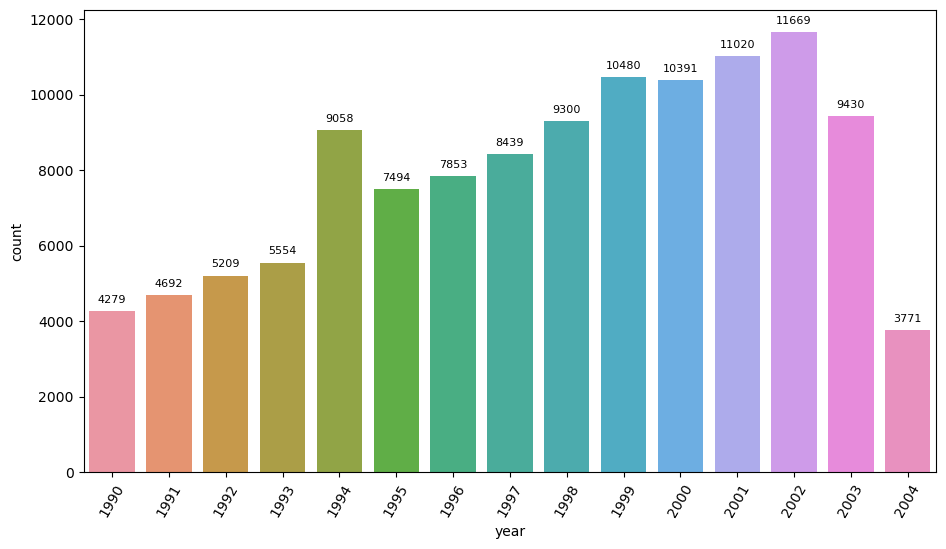

In [8]:
my_dict=(books['year_of_publication'].value_counts()).to_dict()
count = pd.DataFrame(list(my_dict.items()), columns = ['year', 'count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)

fig = plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count', x= 'year', data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='center')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',
                 size=8, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

# book_author가 nan인 부분 채워넣기

In [9]:
books[books['book_author'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher,language,category,summary,img_path
73737,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,NaN,NaN,NaN,images/0751352497.01.THUMBZZZ.jpg


In [10]:
books['book_author'].fillna('unknown', inplace=True)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 149570 non-null  object
 1   book_title           149570 non-null  object
 2   book_author          149570 non-null  object
 3   year_of_publication  149570 non-null  int64 
 4   publisher            149570 non-null  object
 5   language             82343 non-null   object
 6   category             80719 non-null   object
 7   summary              82343 non-null   object
 8   img_path             149570 non-null  object
dtypes: int64(1), object(8)
memory usage: 10.3+ MB


# language가 nan인 부분 채워넣기

In [11]:
lang_nul = books[books['language'].isnull()]
lang_nul

,isbn,book_title,book_author,year_of_publication,publisher,language,category,summary,img_path
5,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,NaN,NaN,NaN,images/0671870432.01.THUMBZZZ.jpg
8,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg
9,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg
10,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,NaN,NaN,NaN,images/1558746218.01.THUMBZZZ.jpg
11,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...
149560,0345330293,Town Like Alice,Nevil Shute,1981,Ballantine Books,NaN,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg
149561,8408044079,LA Muerte Del Decano,Gonzalo Torrrente Ballester,2002,Planeta Publishing Corporation,NaN,NaN,NaN,images/8408044079.01.THUMBZZZ.jpg
149564,0743525493,The Motley Fool's What To Do with Your Money N...,David Gardner,2002,Simon & Schuster Audio,NaN,NaN,NaN,images/0743525493.01.THUMBZZZ.jpg
149567,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books,NaN,NaN,NaN,images/0884159221.01.THUMBZZZ.jpg


In [12]:
### 언어가 가 없는 책은 summary도 존재하지않음
lang_nul[~lang_nul['summary'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher,language,category,summary,img_path


### title로 language 추측

In [13]:
model = fasttext.load_model("lid.176.ftz")

def language_p1(x):
    label, rel = model.predict(x)
    return label[0].split('__')[2], rel[0]

tem = lang_nul['book_title'].apply(language_p1).apply(pd.Series)

In [14]:
tem

,0,1
5,en,0.462294
8,en,0.547843
9,en,0.526549
10,en,0.875083
11,en,0.794063
...,...,...
149560,en,0.489432
149561,es,0.408248
149564,en,0.760895
149567,en,0.362029


In [15]:
books.loc[lang_nul.index, 'book_language_p1_val'] = tem[0]
books.loc[lang_nul.index, 'book_language_p1_rel'] = tem[1]
books['book_language_p1_rel'] = books['book_language_p1_rel'].astype('float')

In [16]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  149570 non-null  object 
 1   book_title            149570 non-null  object 
 2   book_author           149570 non-null  object 
 3   year_of_publication   149570 non-null  int64  
 4   publisher             149570 non-null  object 
 5   language              82343 non-null   object 
 6   category              80719 non-null   object 
 7   summary               82343 non-null   object 
 8   img_path              149570 non-null  object 
 9   book_language_p1_val  67227 non-null   object 
 10  book_language_p1_rel  67227 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 12.6+ MB


In [17]:
books['book_language_p1_val'].value_counts()

book_language_p1_val
en    54033
de     5004
fr     3020
es     2399
it      725
      ...  
tg        1
bo        1
is        1
el        1
ga        1
Name: count, Length: 92, dtype: int64

In [19]:
books.to_csv('../data/books_m1.csv', index=False)
!cp ../data/books_m1.csv ../data/books.csv

### publisher가 1개의 언어만 출했을 때 language 추측

In [18]:
LngNulPub = lang_nul['publisher'].unique()
LngNulPub

array(['Audioworks', 'House of Anansi Press', 'Mira Books', ...,
       'Hitchcock Pub Co', 'Lone Star Books', 'American Map Corporation'],
      dtype=object)

In [19]:
def language_p2(group):
    x = group['language'].dropna()
    if len(x) == 1:    
        return group['language'].fillna(x.iloc[0])
    else:
        return group['language']

books['book_language_p2'] = books.groupby('publisher').apply(language_p2).reset_index(level=0, drop=True)

In [20]:
books['book_language_p2'].value_counts()

book_language_p2
en       80934
de        1463
es        1188
fr        1039
it         179
nl          88
pt          66
da          41
ca          33
no          11
ms          11
gl           5
zh-CN        4
ru           3
ja           3
la           3
ro           1
el           1
th           1
fa           1
eo           1
gd           1
ga           1
vi           1
zh-TW        1
ko           1
Name: count, dtype: int64

### publisher의 최빈 언어로 예측 및, 최빈 비율추가

In [21]:
def language_p3(group):
    langs = group['language'].dropna()
    if not langs.empty:
        mode = langs.mode().iloc[0]
        mode_proportion = (langs == mode).sum() / len(langs)

        group.loc[group['language'].isnull(), 'book_language_p3_rel'] = mode_proportion

        group.loc[group['language'].isnull(), 'book_language_p3_val'] = group['language'].fillna(mode)
    
    return group

books = books.groupby('publisher').apply(language_p3)

In [22]:
books.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 149570 entries, (' Editions P. Terrail', 139088) to ('Ã?lbaum', 97402)
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  149570 non-null  object 
 1   book_title            149570 non-null  object 
 2   book_author           149570 non-null  object 
 3   year_of_publication   149570 non-null  int64  
 4   publisher             149570 non-null  object 
 5   language              82343 non-null   object 
 6   category              80719 non-null   object 
 7   summary               82343 non-null   object 
 8   img_path              149570 non-null  object 
 9   book_language_p1_val  67227 non-null   object 
 10  book_language_p1_rel  67227 non-null   float64
 11  book_language_p2      85081 non-null   object 
 12  book_language_p3_rel  59127 non-null   float64
 13  book_language_p3_val  59127 non-null   object 
dtypes: float6

# publisher_code 추가

In [23]:
books['publisher_code'] = books['isbn'].apply(lambda x: x[:4])
books['publisher_code'].value_counts()

publisher_code
0373    5268
0671    5260
0553    4753
0312    4043
0140    3518
        ... 
4385       1
9571       1
4403       1
4095       1
4091       1
Name: count, Length: 1525, dtype: int64

# category 추가

In [24]:
books['category']

publisher                               
 Editions P. Terrail              139088                                NaN
 Tri-State Press                  92335                                 NaN
'K' Pub                           33285                                 NaN
10-18                             23864          ['Aboriginal Australians']
                                  27852                                 NaN
                                                         ...               
Ã?ditions du Seuil                91230     ['Amour - Aspect sociologique']
                                  99382                                 NaN
                                  118086                                NaN
Ã?ditions la Matze : Guy Gessler  115555                                NaN
Ã?lbaum                           97402                                 NaN
Name: category, Length: 149570, dtype: object

In [25]:
import re

books.loc[books['category'].notnull().index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub(r'[\W_]+', ' ', x))

In [26]:
books['category'].value_counts()

category
 Fiction                     32956
 Juvenile Fiction             5804
 Biography Autobiography      3320
 History                      1925
 Religion                     1818
                             ...  
 Chinese language                1
 Apostasy                        1
 Camels                          1
 Tennis                          1
 Summer                          1
Name: count, Length: 4137, dtype: int64

In [27]:
books['category'] = books['category'].str.lower()
books['category'].value_counts()

category
 fiction                        33016
 juvenile fiction                5835
 biography autobiography         3326
 history                         1927
 religion                        1818
                                ...  
 horse shows                        1
 emigration and immigration         1
 ciphers                            1
 baths                              1
 americanization                    1
Name: count, Length: 4105, dtype: int64

In [28]:
category_df = pd.DataFrame(books['category'].value_counts()).reset_index()
category_df.columns = ['category', 'count']
category_df

,category,count
0,fiction,33016
1,juvenile fiction,5835
2,biography autobiography,3326
3,history,1927
4,religion,1818
...,...,...
4100,horse shows,1
4101,emigration and immigration,1
4102,ciphers,1
4103,baths,1


In [29]:
category_df[category_df['count'] >= 10]

,category,count
0,fiction,33016
1,juvenile fiction,5835
2,biography autobiography,3326
3,history,1927
4,religion,1818
...,...,...
253,college students,10
254,intelligence service,10
255,beauty personal,10
256,diary fiction,10


In [30]:
categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_p1'] = category

In [31]:
books['category_p1'].value_counts()

category_p1
nan                90691
fiction            39678
religion            1824
nonfiction          1427
humor               1291
social              1271
business            1146
cook                1125
science             1063
family               988
literary             848
computer             806
language             804
poetry               740
psycholog            729
travel               672
drama                537
children             525
philosophy           491
crafts               413
music                365
garden               294
animal               225
adventure            208
house                203
photograph           175
literature           174
christian            138
architect            129
science fiction      128
india                 98
motion picture        76
mathemat              73
criminal              39
camp                  38
disease               32
bird                  26
electronic            25
ecology               17
environmental

In [32]:
books.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 149570 entries, (' Editions P. Terrail', 139088) to ('Ã?lbaum', 97402)
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  149570 non-null  object 
 1   book_title            149570 non-null  object 
 2   book_author           149570 non-null  object 
 3   year_of_publication   149570 non-null  int64  
 4   publisher             149570 non-null  object 
 5   language              82343 non-null   object 
 6   category              80719 non-null   object 
 7   summary               82343 non-null   object 
 8   img_path              149570 non-null  object 
 9   book_language_p1_val  67227 non-null   object 
 10  book_language_p1_rel  67227 non-null   float64
 11  book_language_p2      85081 non-null   object 
 12  book_language_p3_rel  59127 non-null   float64
 13  book_language_p3_val  59127 non-null   object 
 14  publisher

### rating_count, mean, mode, std 계산

In [33]:
train_ratings = pd.read_csv('../data/train_ratings.csv.bak')
train_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306795 entries, 0 to 306794
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  306795 non-null  int64 
 1   isbn     306795 non-null  object
 2   rating   306795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [34]:
book_rating_counts = train_ratings.groupby('isbn')['rating'].count()
book_rating_counts

isbn
0000913154    1
000104687X    1
0001047213    1
0001047973    2
000104799X    1
             ..
B0001FZGBC    1
B0001FZGPI    1
B0001FZGRQ    1
B0001GMSV2    2
B000234N3A    1
Name: rating, Length: 129777, dtype: int64

In [35]:
books = books.merge(book_rating_counts, on='isbn', how='left')
books = books.rename(columns={'rating': 'book_rating_count'})
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  149570 non-null  object 
 1   book_title            149570 non-null  object 
 2   book_author           149570 non-null  object 
 3   year_of_publication   149570 non-null  int64  
 4   publisher             149570 non-null  object 
 5   language              82343 non-null   object 
 6   category              80719 non-null   object 
 7   summary               82343 non-null   object 
 8   img_path              149570 non-null  object 
 9   book_language_p1_val  67227 non-null   object 
 10  book_language_p1_rel  67227 non-null   float64
 11  book_language_p2      85081 non-null   object 
 12  book_language_p3_rel  59127 non-null   float64
 13  book_language_p3_val  59127 non-null   object 
 14  publisher_code        149570 non-null  object 
 15  

In [36]:
book_rating_means = train_ratings.groupby('isbn')['rating'].mean()
books = books.merge(book_rating_means, on='isbn', how='left')
books = books.rename(columns={'rating': 'book_rating_mean'})
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  149570 non-null  object 
 1   book_title            149570 non-null  object 
 2   book_author           149570 non-null  object 
 3   year_of_publication   149570 non-null  int64  
 4   publisher             149570 non-null  object 
 5   language              82343 non-null   object 
 6   category              80719 non-null   object 
 7   summary               82343 non-null   object 
 8   img_path              149570 non-null  object 
 9   book_language_p1_val  67227 non-null   object 
 10  book_language_p1_rel  67227 non-null   float64
 11  book_language_p2      85081 non-null   object 
 12  book_language_p3_rel  59127 non-null   float64
 13  book_language_p3_val  59127 non-null   object 
 14  publisher_code        149570 non-null  object 
 15  

In [37]:
book_rating_modes = train_ratings.groupby('isbn')['rating'].agg(lambda x: x.mode().iloc[0])
books = books.merge(book_rating_modes, on='isbn', how='left')
books = books.rename(columns={'rating': 'book_rating_mode'})
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  149570 non-null  object 
 1   book_title            149570 non-null  object 
 2   book_author           149570 non-null  object 
 3   year_of_publication   149570 non-null  int64  
 4   publisher             149570 non-null  object 
 5   language              82343 non-null   object 
 6   category              80719 non-null   object 
 7   summary               82343 non-null   object 
 8   img_path              149570 non-null  object 
 9   book_language_p1_val  67227 non-null   object 
 10  book_language_p1_rel  67227 non-null   float64
 11  book_language_p2      85081 non-null   object 
 12  book_language_p3_rel  59127 non-null   float64
 13  book_language_p3_val  59127 non-null   object 
 14  publisher_code        149570 non-null  object 
 15  

In [38]:
book_rating_median = train_ratings.groupby('isbn')['rating'].median()
books = books.merge(book_rating_median, on='isbn', how='left')
books = books.rename(columns={'rating': 'book_rating_median'})
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  149570 non-null  object 
 1   book_title            149570 non-null  object 
 2   book_author           149570 non-null  object 
 3   year_of_publication   149570 non-null  int64  
 4   publisher             149570 non-null  object 
 5   language              82343 non-null   object 
 6   category              80719 non-null   object 
 7   summary               82343 non-null   object 
 8   img_path              149570 non-null  object 
 9   book_language_p1_val  67227 non-null   object 
 10  book_language_p1_rel  67227 non-null   float64
 11  book_language_p2      85081 non-null   object 
 12  book_language_p3_rel  59127 non-null   float64
 13  book_language_p3_val  59127 non-null   object 
 14  publisher_code        149570 non-null  object 
 15  

In [39]:
book_rating_stds = train_ratings.groupby('isbn')['rating'].std()
books = books.merge(book_rating_stds, on='isbn', how='left')
books = books.rename(columns={'rating': 'book_rating_std'})
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  149570 non-null  object 
 1   book_title            149570 non-null  object 
 2   book_author           149570 non-null  object 
 3   year_of_publication   149570 non-null  int64  
 4   publisher             149570 non-null  object 
 5   language              82343 non-null   object 
 6   category              80719 non-null   object 
 7   summary               82343 non-null   object 
 8   img_path              149570 non-null  object 
 9   book_language_p1_val  67227 non-null   object 
 10  book_language_p1_rel  67227 non-null   float64
 11  book_language_p2      85081 non-null   object 
 12  book_language_p3_rel  59127 non-null   float64
 13  book_language_p3_val  59127 non-null   object 
 14  publisher_code        149570 non-null  object 
 15  

In [40]:
fill_zeros = ['book_language_p1_rel', 'book_language_p3_rel', 'book_rating_count', 'book_rating_mean', 'book_rating_mode', 'book_rating_median', 'book_rating_std']
for i in fill_zeros:
    books[i].fillna(0, inplace=True)

In [41]:
fill_blank = ['language', 'category', 'summary', 'book_language_p1_val', 'book_language_p2', 'book_language_p3_val', 'category_p1']
for i in fill_blank:
    books[i].fillna('unknown', inplace=True)

In [42]:
# books['category_p1'] = books['category_p1'].cat.add_categories(['unknown'])
books.loc[books['category_p1'] == 'nan', 'category_p1'] = 'unknown'

In [43]:
change_type = ['language', 'category', 'book_language_p1_val', 'book_language_p2', 'book_language_p3_val', 'publisher_code', 'category_p1']
for i in change_type:
    books[i] = books[i].astype('category')

In [44]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   isbn                  149570 non-null  object  
 1   book_title            149570 non-null  object  
 2   book_author           149570 non-null  object  
 3   year_of_publication   149570 non-null  int64   
 4   publisher             149570 non-null  object  
 5   language              149570 non-null  category
 6   category              149570 non-null  category
 7   summary               149570 non-null  object  
 8   img_path              149570 non-null  object  
 9   book_language_p1_val  149570 non-null  category
 10  book_language_p1_rel  149570 non-null  float64 
 11  book_language_p2      149570 non-null  category
 12  book_language_p3_rel  149570 non-null  float64 
 13  book_language_p3_val  149570 non-null  category
 14  publisher_code        149570 non-nul

In [45]:
books.to_csv('../data/books_m1.csv', index=False)